# Plot Percentiles

In [1]:
import sys
import os
import glob
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
sys.path.append('/g/data/mn51/users/jb6465/drought-github/submodules/gwls')
from gwl import get_GWL_timeslice
sys.path.append('/g/data/mn51/users/jb6465/drought-github')
import utils

#### SWITCHES (toggle on / off)

In [2]:
BC_SWITCH = True
AGCD_MASK_SWITCH = True

In [3]:
cd /g/data/mn51/users/jb6465/drought-github/submodules/plotting_maps

/g/data/mn51/users/jb6465/drought-github/submodules/plotting_maps


In [4]:
from acs_plotting_maps import *

CPU times: user 21min 22s, sys: 4.27 s, total: 21min 26s
Wall time: 21min 41s


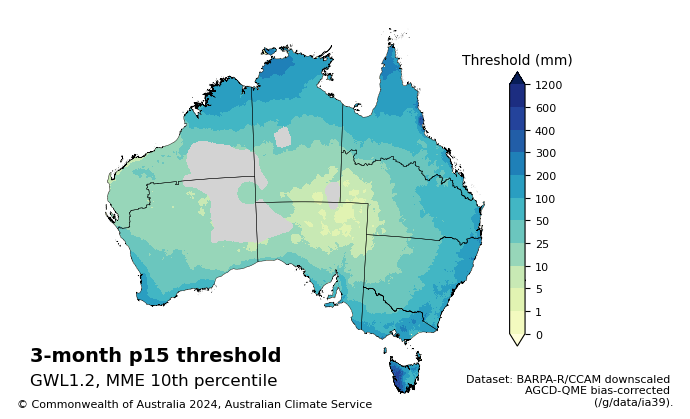

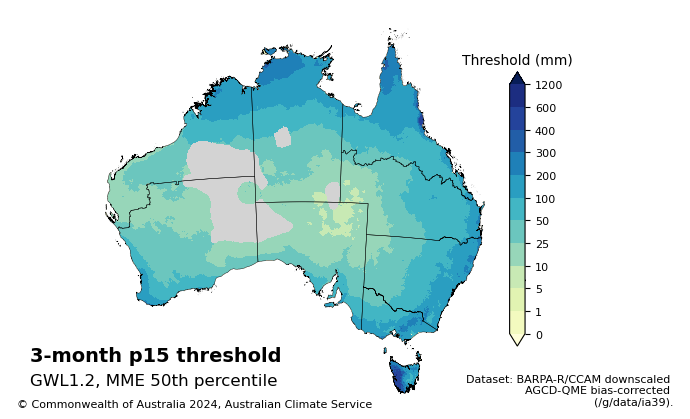

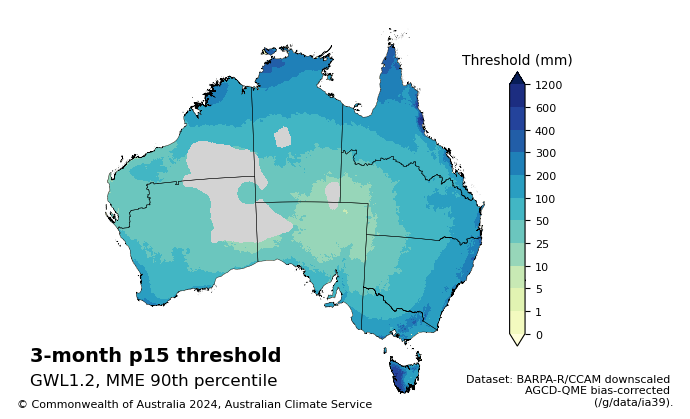

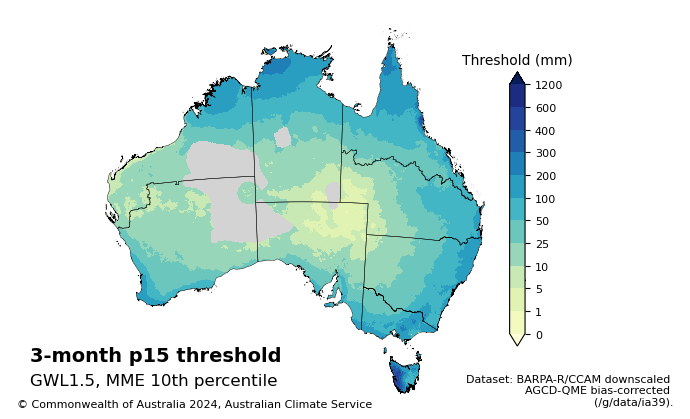

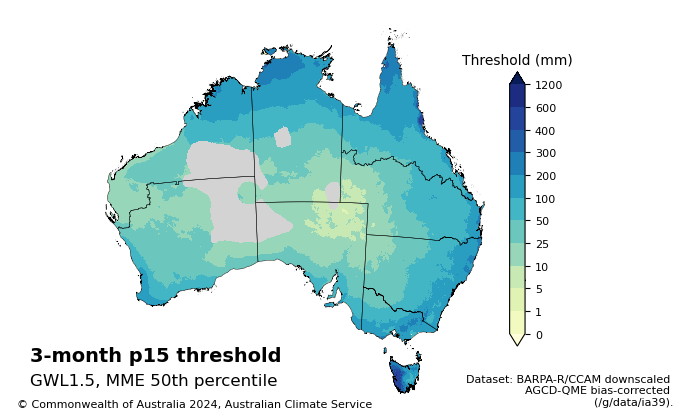

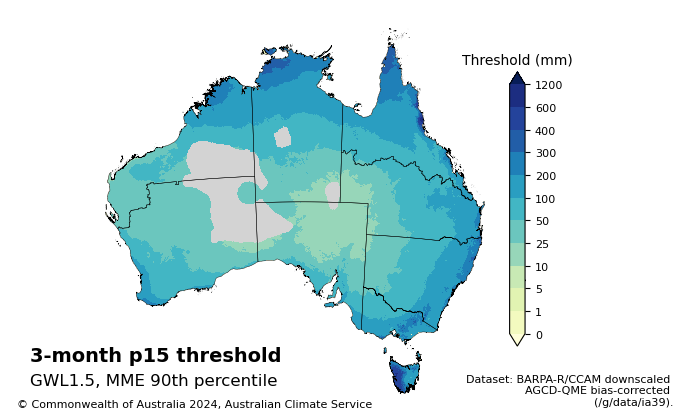

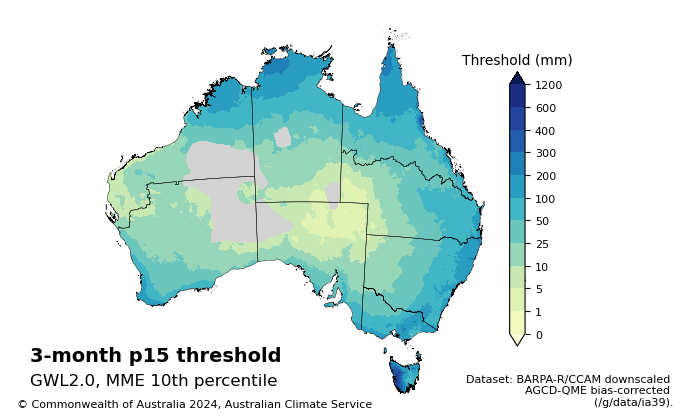

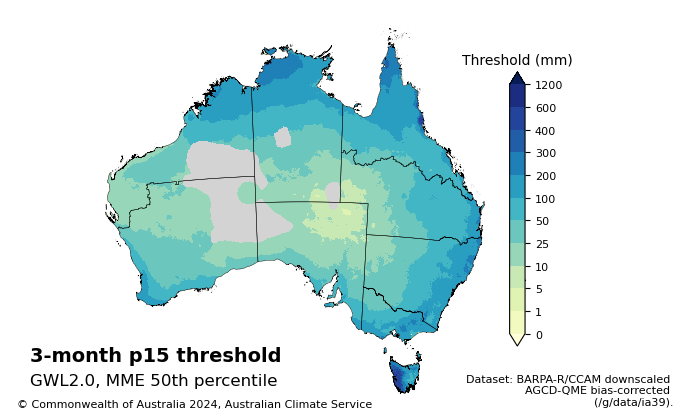

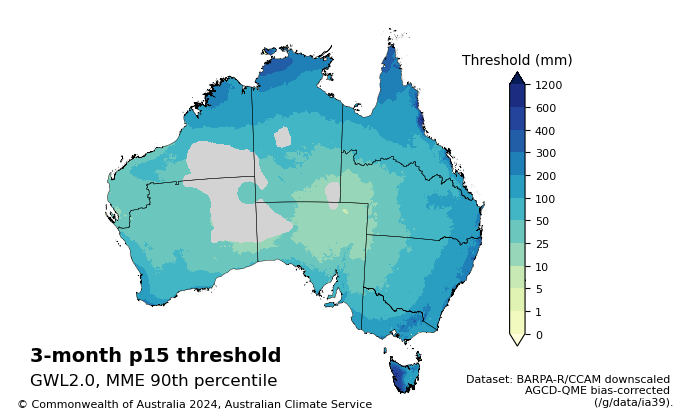

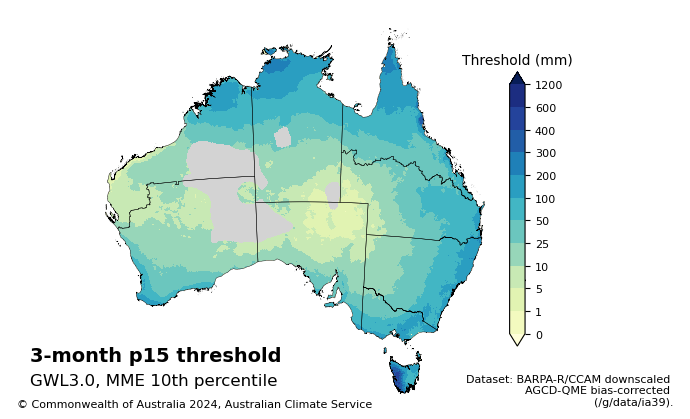

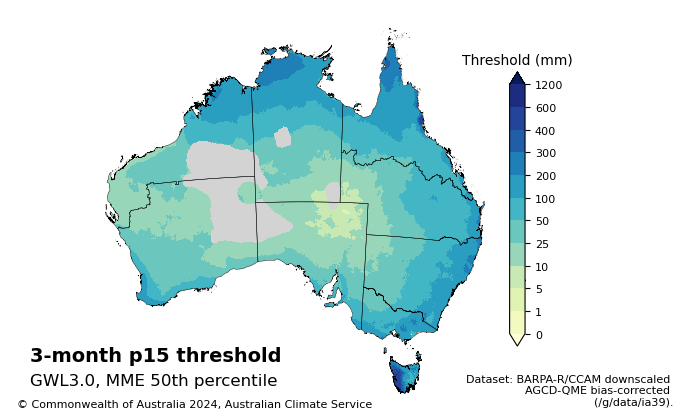

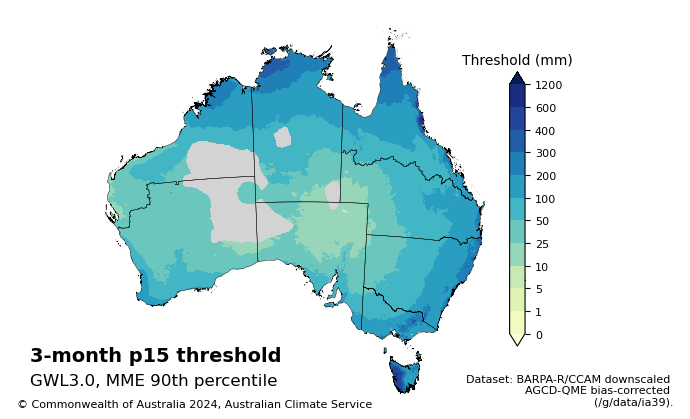

In [9]:
%%time
for GWL in [1.2, 1.5, 2.0, 3.0]:
    for percentile in [0.1, 0.5, 0.9]:
        if BC_SWITCH:
            plot_file = f"/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_BC_5km/p15_3month_GWL_{str(GWL)}_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc"
        else:
            plot_file = f"/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_notBC_5km/p15_3month_GWL_{str(GWL)}_percentiles_10-50-90.nc"
        
        plot_acs_hazard(data = (xr.open_dataset(plot_file).sel(quantile=percentile).p15_3month.mean(dim='month')) if BC_SWITCH==False else (xr.open_dataset(plot_file).sel(quantile=percentile).p15_3month.mean(dim='month')),#.where(q_mask.mask),
        regions = regions_dict['ncra_regions'],
        cmap = cmap_dict["pr"],
        ticks = tick_dict["pr_mon"],
        cbar_label = "Threshold (mm)",
        cbar_extend = "both",
        agcd_mask=AGCD_MASK_SWITCH,
        title = f"3-month p15 threshold",
        dataset_name = "BARPA-R/CCAM downscaled \nNon bias-corrected \n(/g/data/ia39)." if BC_SWITCH == False else "BARPA-R/CCAM downscaled \nAGCD-QME bias-corrected \n(/g/data/ia39).",
        date_range = f"GWL{str(GWL)}, MME {str(int(percentile*100))}th percentile",
        watermark = None,
        contourf = False,
        contour = False,
        issued_date="",
        outfile = f"/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_notBC_5km/figures/p15_3month_GWL{str(GWL)}_percentile_{str(int(percentile*100))}.png" if BC_SWITCH == False else f"/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_BC_5km/figures/p15_3month_GWL{str(GWL)}_ACS-QME-AGCD-1960-2022_percentile_{str(int(percentile*100))}_{'masked' if AGCD_MASK_SWITCH == True else ''}.png"
        );

CPU times: user 15min 43s, sys: 2.12 s, total: 15min 45s
Wall time: 16min 5s


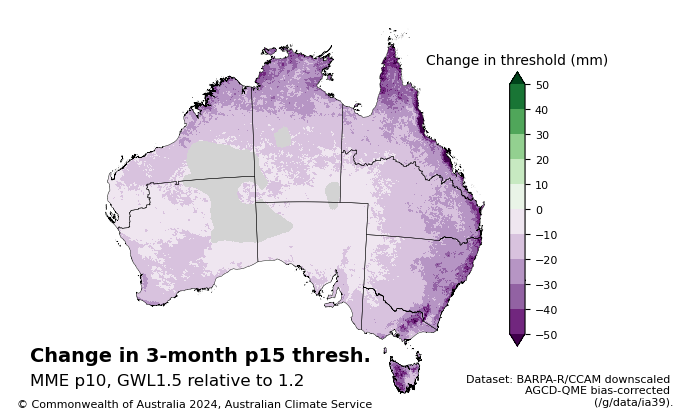

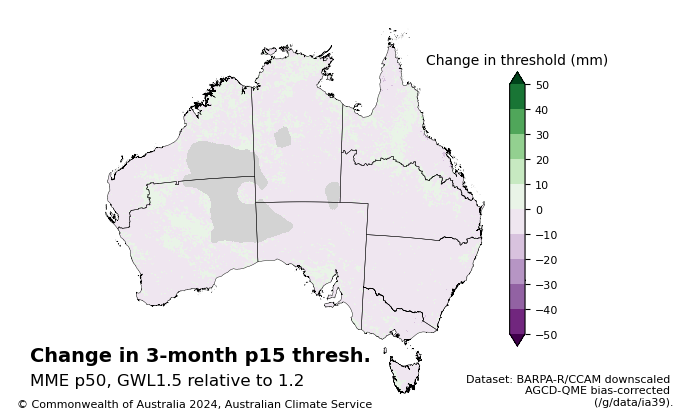

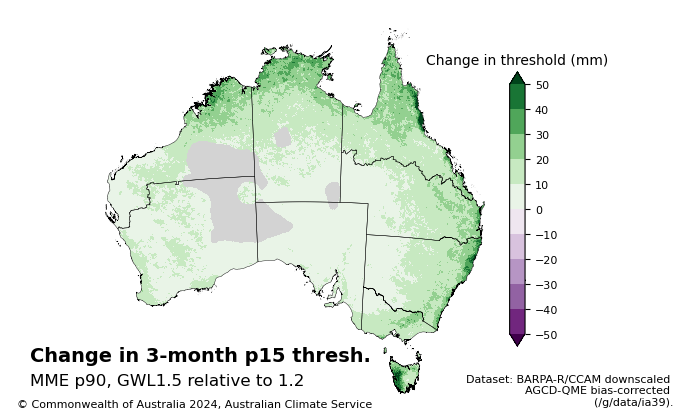

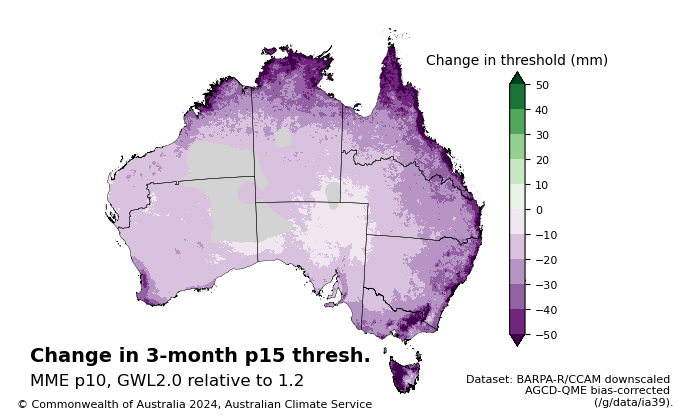

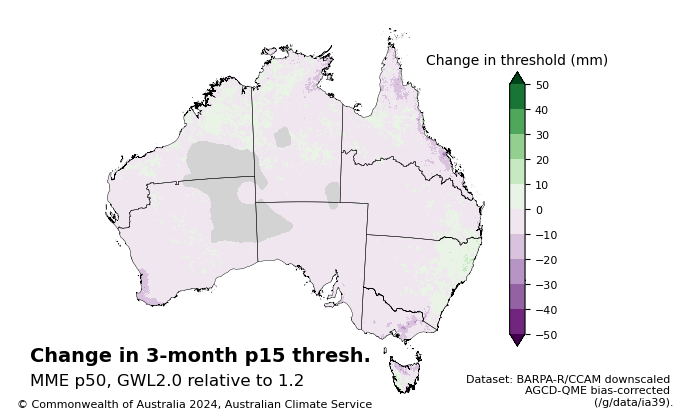

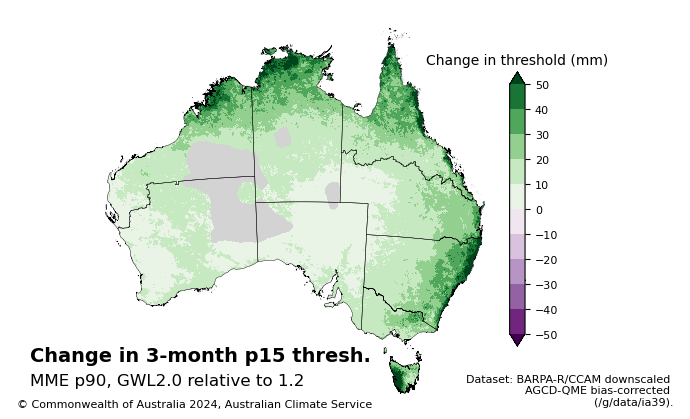

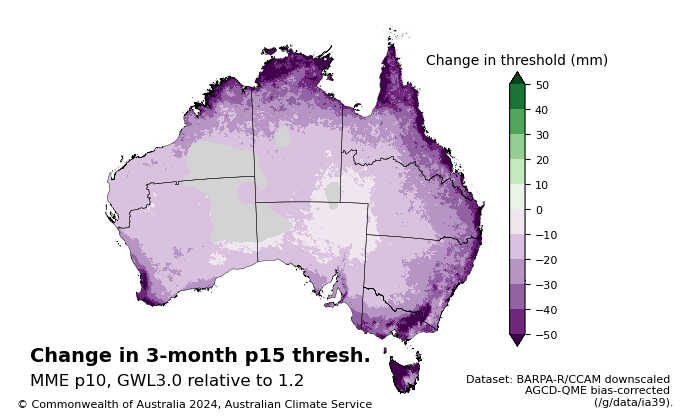

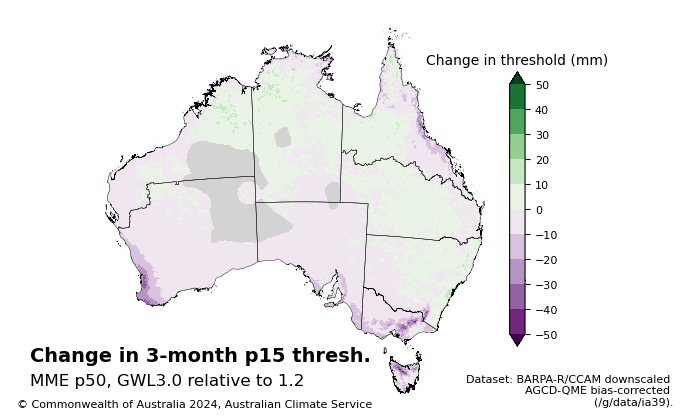

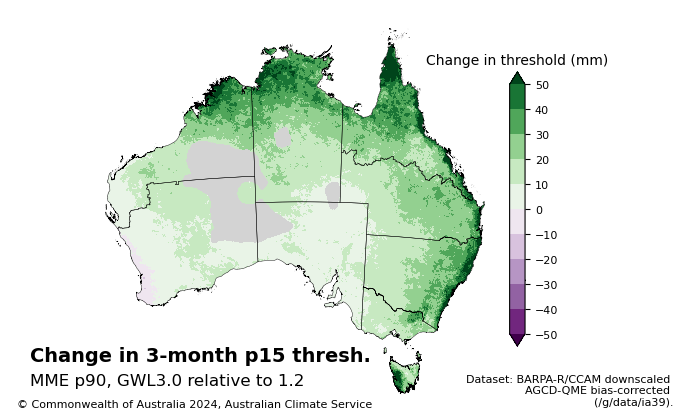

In [12]:
%%time

from matplotlib import cm
for GWL in [1.5, 2.0, 3.0]:
    for percentile in [0.1, 0.5, 0.9]:
        if BC_SWITCH:
            plot_file = f"/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_BC_5km/p15_3month_MME_change_GWL{str(GWL)}_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentiles_10-50-90.nc"
        else:
            plot_file = f"/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_notBC_5km/p15_3month_MME_change_GWL{str(GWL)}_to_GWL1.2_percentiles_10-50-90.nc"
        
        plot_acs_hazard(data = (xr.open_dataset(plot_file).sel(quantile=percentile).p15_3month.mean(dim='month')) if BC_SWITCH == False else (xr.open_dataset(plot_file).sel(quantile=percentile).p15_3month.mean(dim='month')),#.where(q_mask.mask),
        regions = regions_dict['ncra_regions'],
        cmap = cm.PRGn,
        ticks = np.arange(-50, 50.1, 10),
        cbar_label = "Change in threshold (mm)",
        cbar_extend = "both",
        title = f"Change in 3-month p15 thresh.",
        dataset_name = "BARPA-R/CCAM downscaled \nNon bias-corrected \n(/g/data/ia39)." if BC_SWITCH == False else "BARPA-R/CCAM downscaled \nAGCD-QME bias-corrected \n(/g/data/ia39).",
        date_range = f"MME p{str(int(percentile*100))}, GWL{str(GWL)} relative to 1.2",
        watermark = None,
        contourf = False,
        contour = False,
        agcd_mask=AGCD_MASK_SWITCH,
        issued_date="",
        outfile = f"/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_notBC_5km/figures/p15_3month_MME_change_GWL{str(GWL)}_to_GWL1.2_percentile_{str(int(percentile*100))}.png" if BC_SWITCH == False else f"/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_BC_5km/figures/p15_3month_MME_change_GWL{str(GWL)}_to_GWL1.2_ACS-QME-AGCD-1960-2022_percentile_{str(int(percentile*100))}_{'masked' if AGCD_MASK_SWITCH == True else ''}.png"
        );


## Regional statistics and heatmaps
using IPCC-style method - 'Method 3 - IPCC style' (metric and regional mean for each model, then multi model median)

In [3]:
cd /g/data/mn51/users/jb6465/drought-github/submodules/plotting_maps

/g/data/mn51/users/jb6465/drought-github/submodules/plotting_maps


In [4]:
from acs_area_statistics import acs_regional_stats, get_regions
from acs_plotting_maps import *

In [5]:
import glob

if BC_SWITCH:
    input_dir = '/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_BC_5km/GWLs/'
else:
    input_dir = '/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_notBC_5km/GWLs/'

files = []
files.extend(sorted(glob.glob("{}/*AGCD-05i*{}".format(input_dir, '.nc'))))

In [6]:
files

['/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_BC_5km/GWLs/p15_3month_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_v1-r1_GWL1.2_ACS-QME-AGCD-1960-2022.nc',
 '/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_BC_5km/GWLs/p15_3month_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_v1-r1_GWL1.5_ACS-QME-AGCD-1960-2022.nc',
 '/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_BC_5km/GWLs/p15_3month_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_v1-r1_GWL2.0_ACS-QME-AGCD-1960-2022.nc',
 '/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_BC_5km/GWLs/p15_3month_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_BOM_v1-r1_GWL3.0_ACS-QME-AGCD-1960-2022.nc',
 '/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_BC_5km/GWLs/p15_3month_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_CSIRO_v1-r1_GWL1.2_ACS-QME-AGCD-1960-2022.nc',
 '/g/data/ia39/ncra/drought_aridity/rainfall_percentiles/downscaled_BC_5km/GWLs/p15_3month_AGCD-05i_ACCESS-CM2_ssp370_r4i1p1f1_CSIRO_v1-r1

In [7]:
files_GWL12 = [file for file in files if 'GWL1.2' in file]

In [9]:
def plot_heatmap(plot_df, GWL_level, p10_p90_annotation_switch=False):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    sns.set(font_scale=1.5)
    plt.figure(figsize=(18, 7))
    colors = sns.color_palette("PRGn", 10)
    cmap = ListedColormap(colors)
    
    ax = sns.heatmap(plot_df, annot=True, cmap=cmap, linewidth=2, fmt='.0f',
                     cbar_kws={'extend':'both', 'label':'Change (mm)'},
                     center=0,
                     vmin=-50,
                     vmax=50,
                     yticklabels=list(change_df['abbrevs']),
                     xticklabels=[key[:-5].replace('_', ' ').replace('BOM', 'BARPA').replace('CSIRO', 'CCAM') for key in plot_df.columns])
    
    ax.text(len(plot_df.columns) + 0.85, - 0.5, 'Median' , ha='center', va='center')
    ax.text(len(plot_df.columns) + 0.23, 12, r"$\bf{Bold}$" + ' = at least\n66% of ensemble\nmembers agree on \nsign of the change' , size=16, ha='left', va='center', bbox=dict(boxstyle="round,pad=0.7", edgecolor="black", facecolor="none", linewidth=0.25))
    for i, row in plot_df.iterrows():
        median = row.median()
        sign_agreement = ((row>0).sum()/len(row)) if median > 0 else ((row<0).sum()/len(row))
        fontweight = 'bold' if sign_agreement >= 0.66 else 'normal'
        ax.text(len(plot_df.columns) + 0.85, i + 0.5, f'{median:.0f}', ha='center', va='center', fontweight=fontweight)

        if p10_p90_annotation_switch:
            # Get the second highest and second lowest values
            sorted_values = row.sort_values()
            second_highest = sorted_values.iloc[-2]
            second_lowest = sorted_values.iloc[1]
        
            # Find positions of these values
            second_highest_col = sorted_values.index[-2]
            second_lowest_col = sorted_values.index[1]
        
            # Convert column names to indices for annotation
            second_highest_pos = plot_df.columns.get_loc(second_highest_col)
            second_lowest_pos = plot_df.columns.get_loc(second_lowest_col)
        
            # Annotate the heatmap
            ax.text(second_highest_pos + 0.85, i + 0.8, '•', color='red', ha='center', va='center', fontsize=30)
            ax.text(second_lowest_pos + 0.85, i + 0.8, '•', color='blue', ha='center', va='center', fontsize=30)

    #make sure zero values are not coloured positively
    for text in ax.texts:
        x, y = text.get_position()
        if text.get_text()=='0' and x<13:
            ax.text(x, y, '   0  ', ha='center', va='center', bbox=dict(pad=12, edgecolor="none", facecolor="lightgrey"))
    cbar = ax.collections[0].colorbar
    cbar.ax.set_position([0.83, 0.15, 0.03, 0.7])
    
    ax.set_title(f'Change 15th percentile rainfall for GWL {str(GWL_level)} relative to GWL 1.2', fontweight='bold', pad=30)
    ax.text(6.5, -0.45, '\n (AGCD quality mask applied)' if AGCD_MASK_SWITCH == True else '\n (No mask)', ha='center', va='center', size=12)
    plt.savefig(f"/g/data/mn51/users/jb6465/drought-github/figures/15p_threshold_regional_heatmap_change_GWL{GWL_level}{'_masked' if AGCD_MASK_SWITCH else ''}.png", bbox_inches='tight')
    
    plt.show()
    plt.clf()
    return

---> Plotting GWL1.5


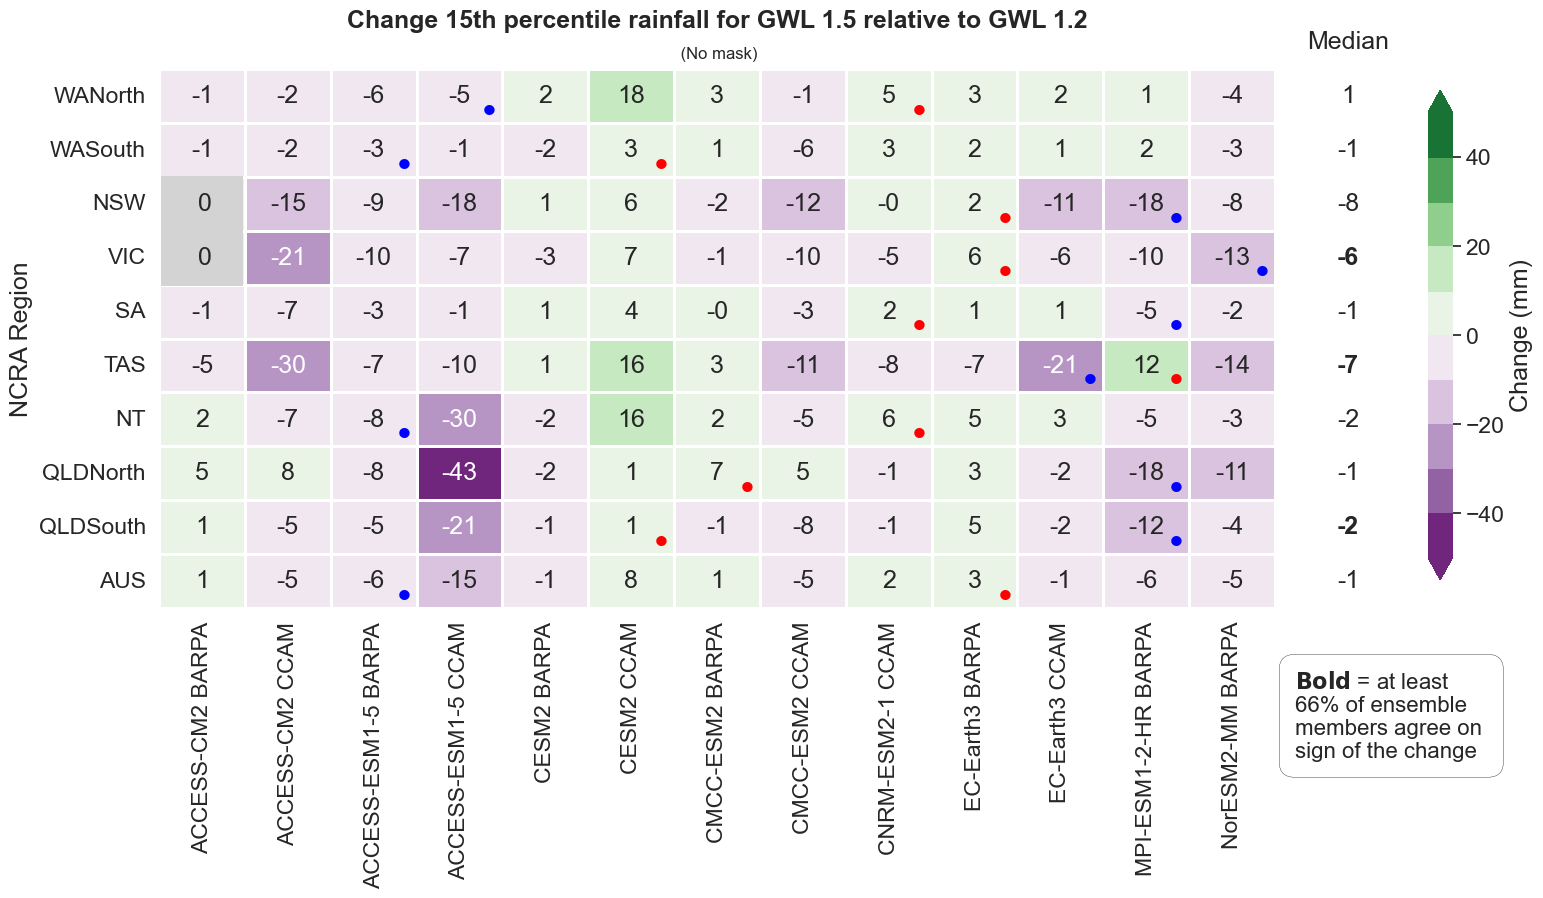

---> Plotting GWL2.0


<Figure size 640x480 with 0 Axes>

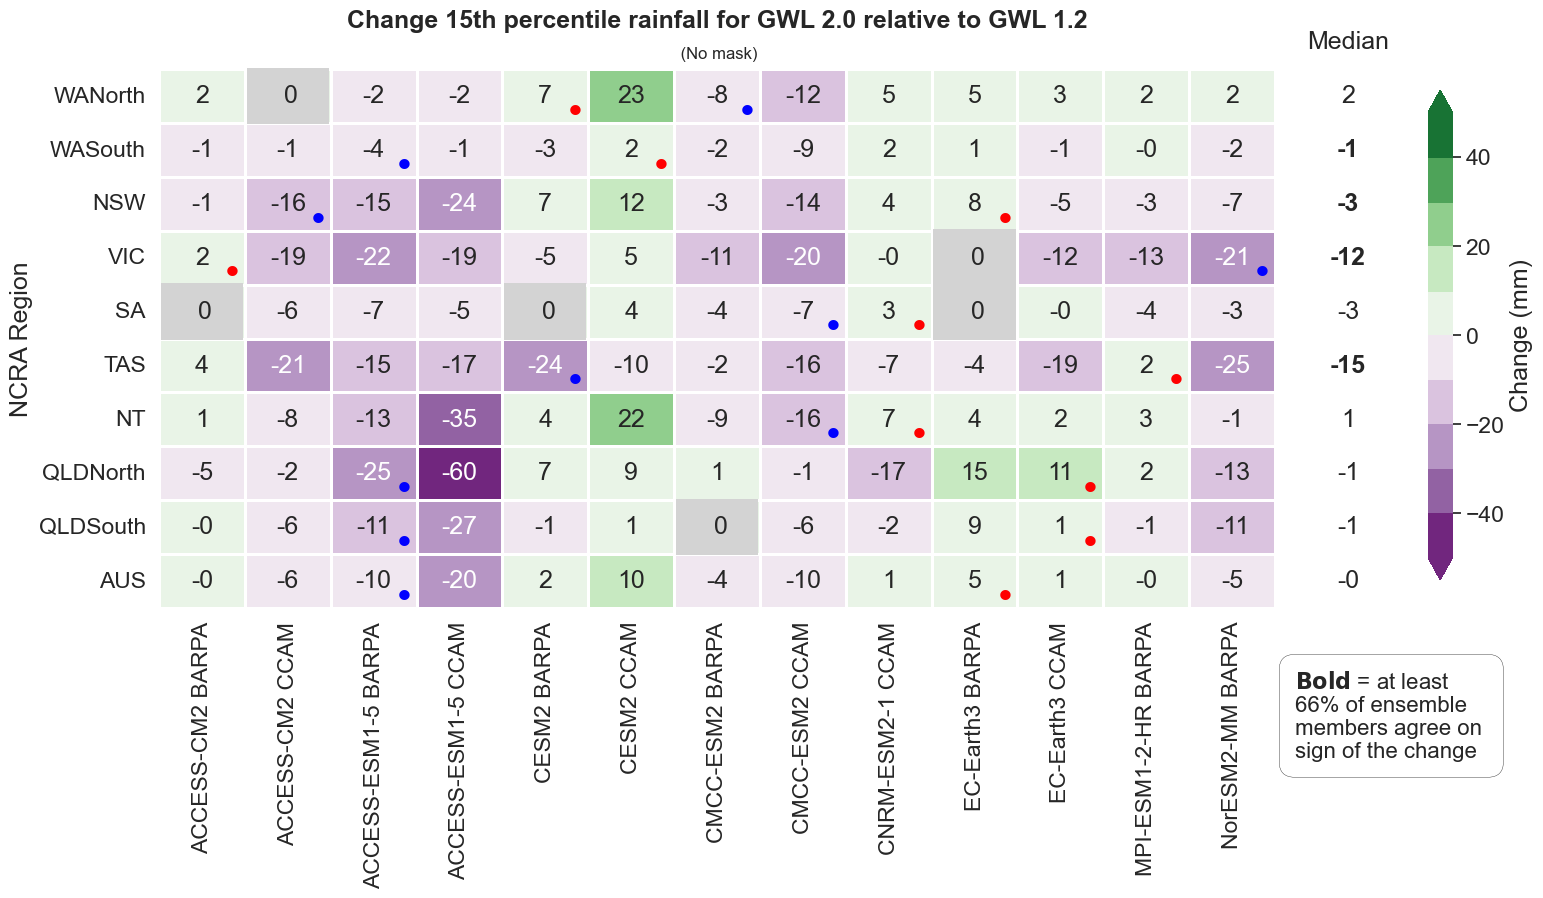

---> Plotting GWL3.0


<Figure size 640x480 with 0 Axes>

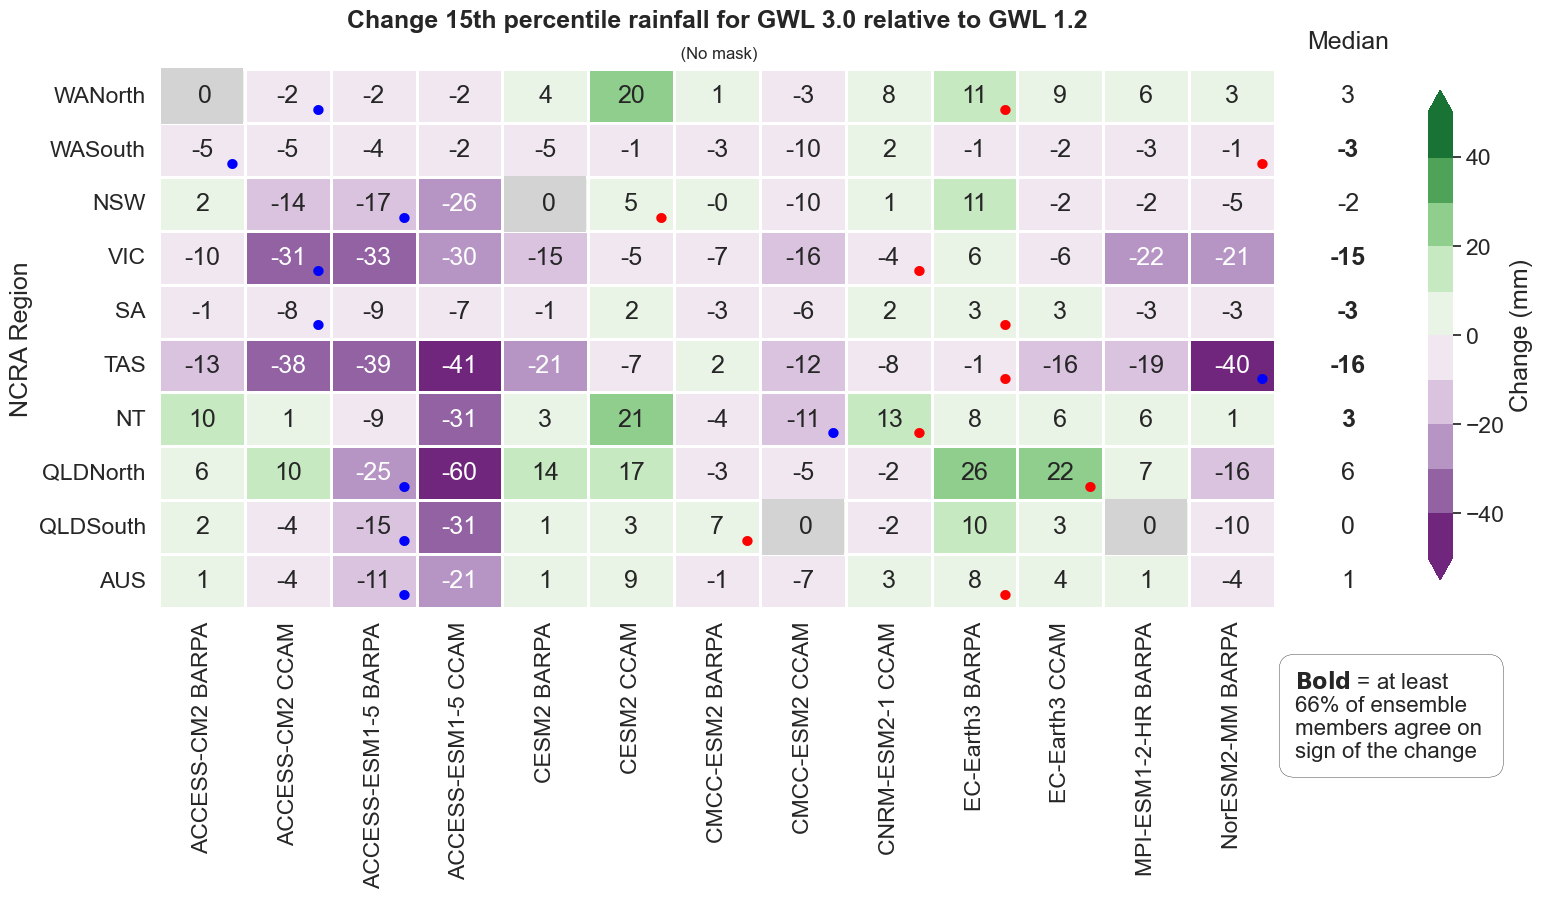

---> Plotting GWL1.5


<Figure size 640x480 with 0 Axes>

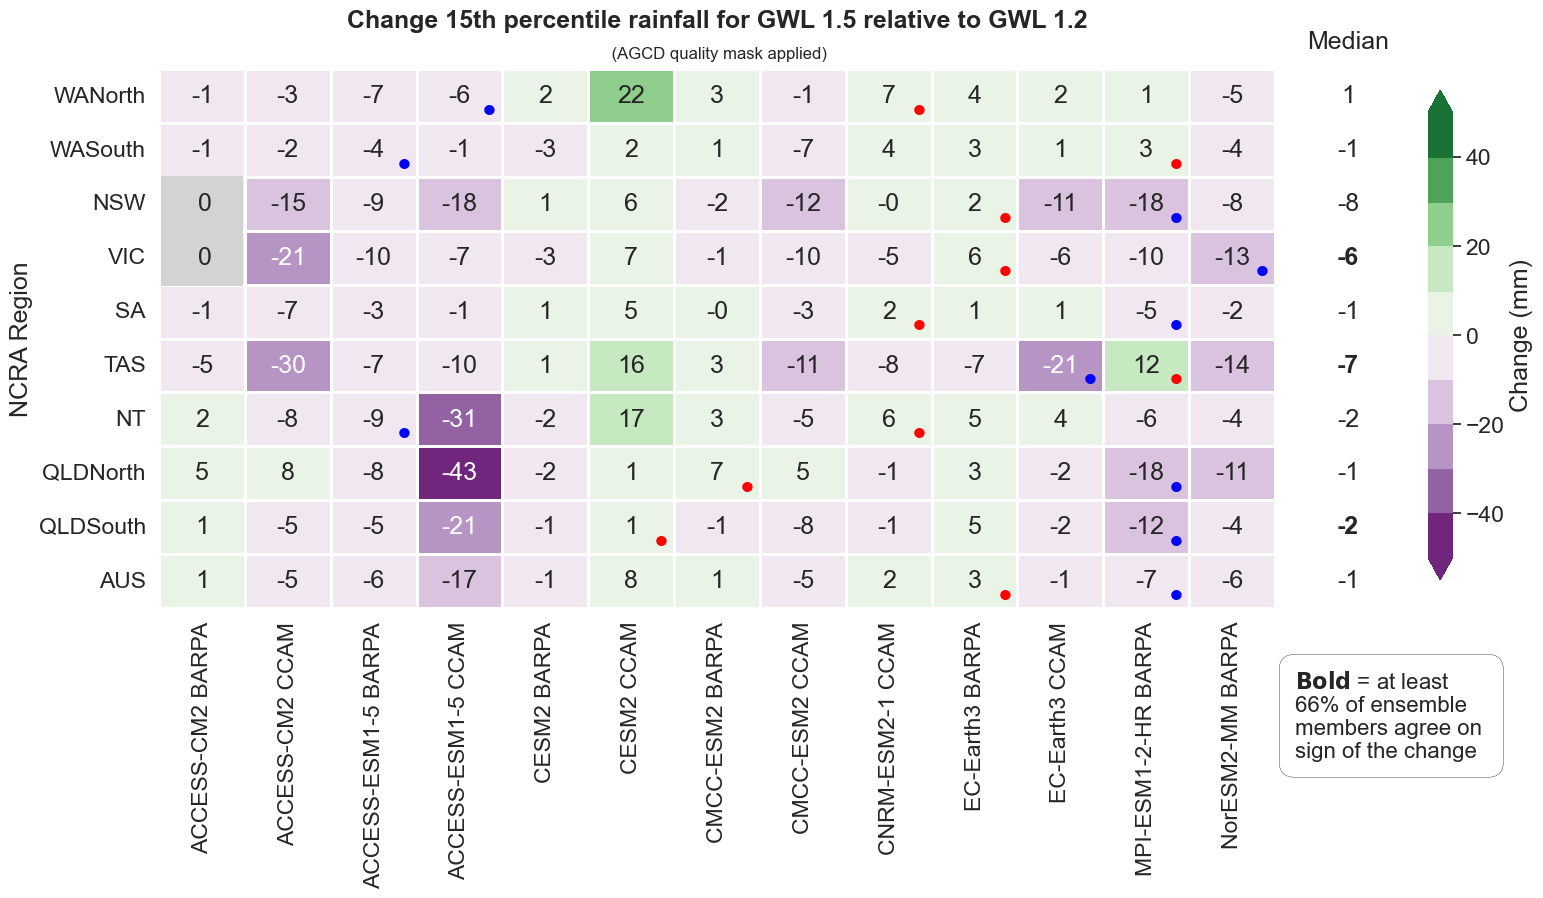

---> Plotting GWL2.0


<Figure size 640x480 with 0 Axes>

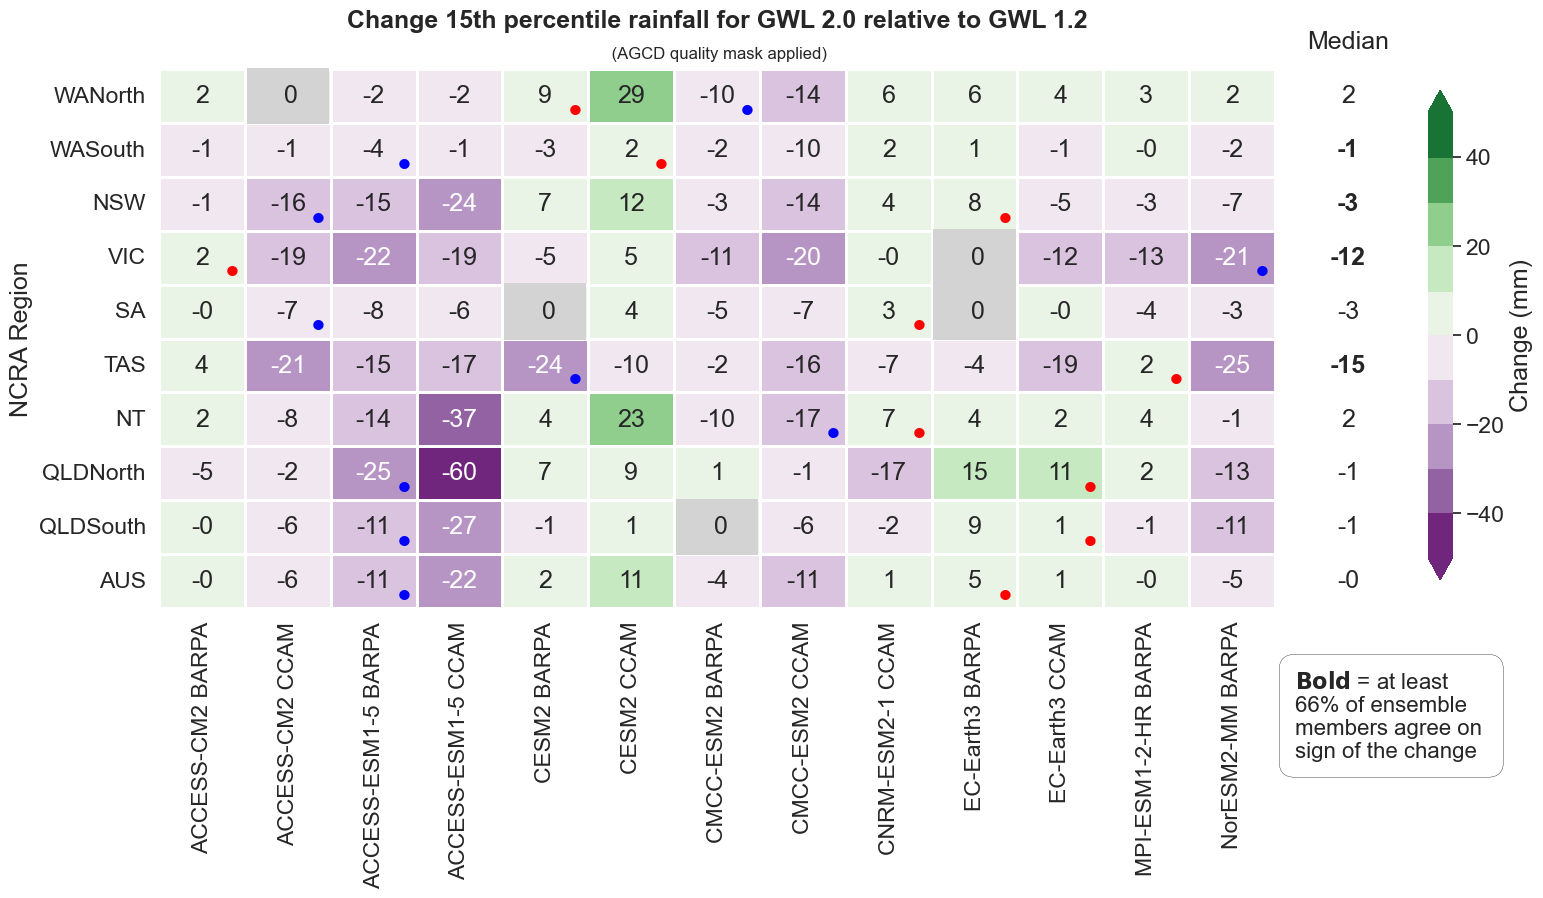

---> Plotting GWL3.0


<Figure size 640x480 with 0 Axes>

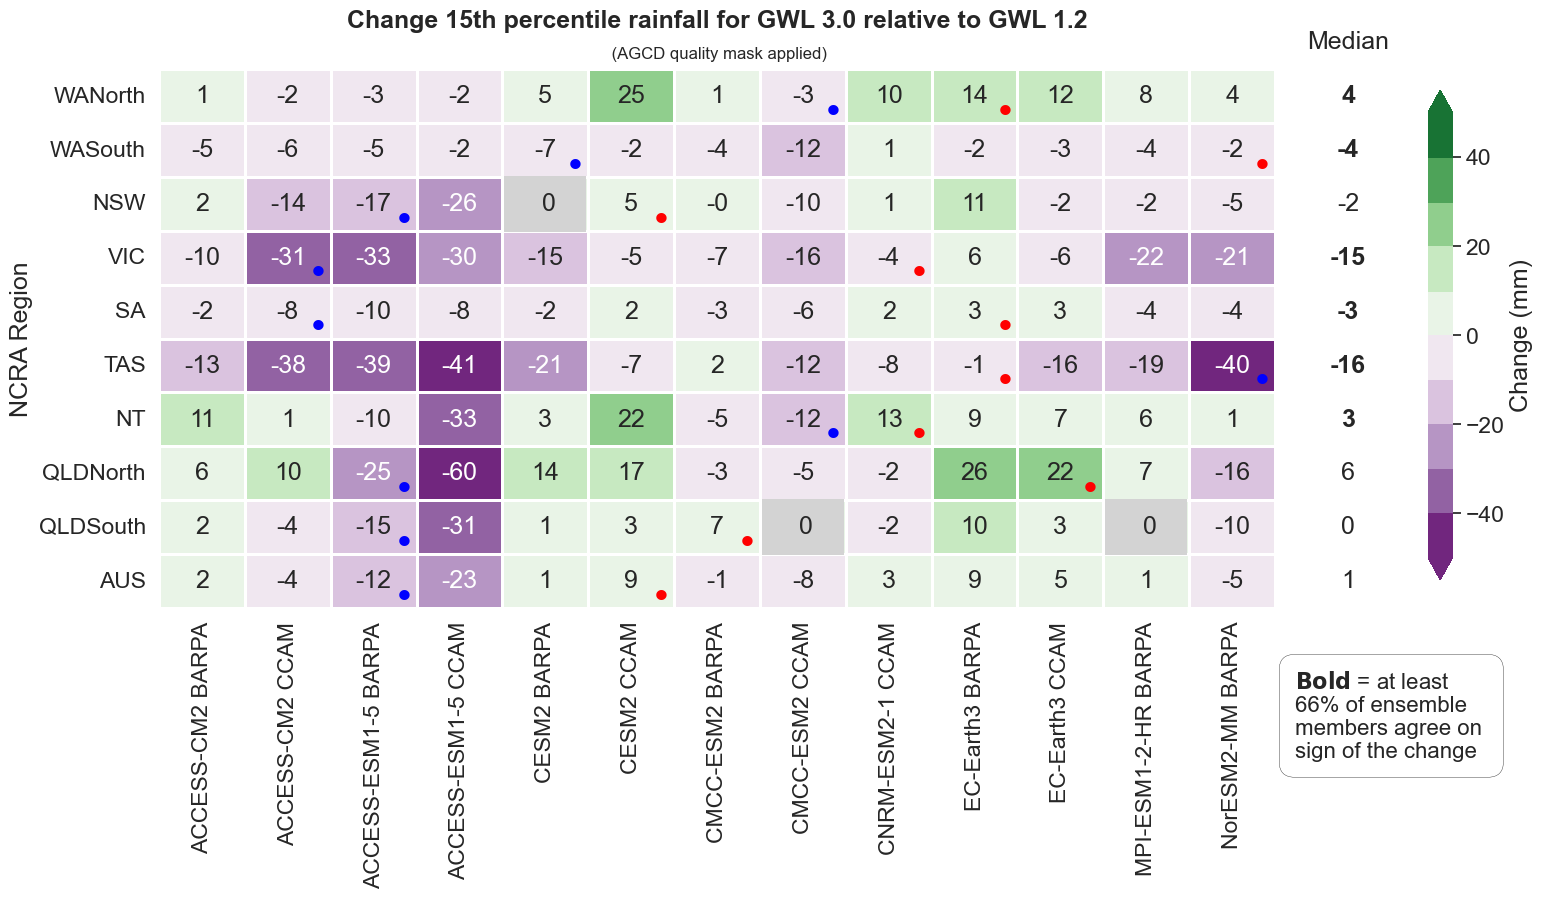

CPU times: user 24min 36s, sys: 2min 22s, total: 26min 58s
Wall time: 26min 54s


<Figure size 640x480 with 0 Axes>

In [10]:
%%time
regions = get_regions(['ncra_regions', 'australia'])
mask_ds = xr.open_dataset("/g/data/ia39/aus-ref-clim-data-nci/shapefiles/masks/AGCD-05i/mask-fraction_agcd_v1-0-2_precip_weight_1960_2022.nc")
q_mask = np.ma.masked_where(mask_ds.fraction >= 0.8, mask_ds.fraction)

for mask_value in [False, True]:
    AGCD_MASK_SWITCH = mask_value
    for GWL_level in [1.5, 2.0, 3.0]:
        df_list = []
        for file_GWL12 in files_GWL12:
            file_GWLx = [file for file in files if file_GWL12.split('_')[-7] in file and file_GWL12.split('_')[-7] in file and f'GWL{str(GWL_level)}' in file][0]
        
            ensemble_member_name = file_GWL12.split('_')[-7]+'_'+file_GWL12.split('_')[-4]
            ds_GWLx = xr.open_dataset(file_GWLx).mean(dim='month') if AGCD_MASK_SWITCH==False else xr.open_dataset(file_GWLx).mean(dim='month').where(q_mask.mask)
            ds_GWL12 = xr.open_dataset(file_GWL12).mean(dim='month') if AGCD_MASK_SWITCH==False else xr.open_dataset(file_GWL12).mean(dim='month').where(q_mask.mask)
            GWLx_change = (ds_GWLx - ds_GWL12).rename({'p15_3month': ensemble_member_name})      
            mask_frac = regions.mask_3D_frac_approx(GWLx_change)
            dims = ("lat", "lon",)
            change_df = acs_regional_stats(ds=GWLx_change,var=ensemble_member_name, mask=mask_frac, dims = dims, how = ["mean"]).to_dataframe()
            df_list.append(change_df[change_df.columns[-1]])
    
        plot_df = pd.concat(df_list, axis=1).rename_axis('NCRA Region')
        plot_df = plot_df.round(decimals=0)
            
        print(f'---> Plotting GWL{str(GWL_level)}')
        plot_heatmap(plot_df, GWL_level, p10_p90_annotation_switch=True)


## Do absolute heatmaps with regional mean and multi model median

In [8]:
def plot_heatmap(plot_df, GWL_level, p10_p90_annotation_switch=False):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    from matplotlib.colors import ListedColormap

    sns.set(font_scale=1.5)
    plt.figure(figsize=(18, 7))
    colors = sns.color_palette("mako_r", 12)
    cmap = ListedColormap(colors)
    ticks = np.arange(0,350,50)#tick_dict["pr_mon"]
    
    ax = sns.heatmap(plot_df, annot=True, cmap=cmap, linewidth=2, fmt='.0f',
                     cbar_kws={'extend':'max', 'label':'Threshold (mm)'},
                     # center=0,
                     vmin=0,
                     vmax=300,
                     yticklabels=list(df['abbrevs']),
                     xticklabels=[key[:-5].replace('_', ' ').replace('BOM', 'BARPA').replace('CSIRO', 'CCAM') for key in plot_df.columns])
    
    ax.text(len(plot_df.columns) + 0.85, - 0.5, 'Median' , ha='center', va='center')
    for i, row in plot_df.iterrows():
        median = row.median()
        ax.text(len(plot_df.columns) + 0.85, i + 0.5, f'{median:.1f}', ha='center', va='center', fontweight='normal')

        if p10_p90_annotation_switch:
            # Get the second highest and second lowest values
            sorted_values = row.sort_values()
            second_highest = sorted_values.iloc[-2]
            second_lowest = sorted_values.iloc[1]
        
            # Find positions of these values
            second_highest_col = sorted_values.index[-2]
            second_lowest_col = sorted_values.index[1]
        
            # Convert column names to indices for annotation
            second_highest_pos = plot_df.columns.get_loc(second_highest_col)
            second_lowest_pos = plot_df.columns.get_loc(second_lowest_col)
        
            # Annotate the heatmap
            ax.text(second_highest_pos + 0.85, i + 0.8, '•', color='red', ha='center', va='center', fontsize=30)
            ax.text(second_lowest_pos + 0.85, i + 0.8, '•', color='blue', ha='center', va='center', fontsize=30)

    #make sure zero values are not coloured positively
    for text in ax.texts:
        x, y = text.get_position()
        if (text.get_text()=='0' or text.get_text()=='-0') and x<13:
            ax.text(x, y, '   0  ', ha='center', va='center', bbox=dict(pad=12, edgecolor="none", facecolor="lightgrey"))
        
    cbar = ax.collections[0].colorbar
    cbar.ax.set_position([0.83, 0.15, 0.03, 0.7])
    
    ax.set_title(f'15th percentile rainfall for GWL {str(GWL_level)}', fontweight='bold', pad=30)
    ax.text(6.5, -0.45, '\n (AGCD quality mask applied)' if AGCD_MASK_SWITCH == True else '\n (No mask)', ha='center', va='center', size=12)
    
    plt.savefig(f"/g/data/mn51/users/jb6465/drought-github/figures/15p_threshold_heatmap_absolute_GWL{GWL_level}{'_masked' if AGCD_MASK_SWITCH else ''}.png", bbox_inches='tight')
    
    plt.show()
    plt.clf()
    return

---> Plotting GWL1.2


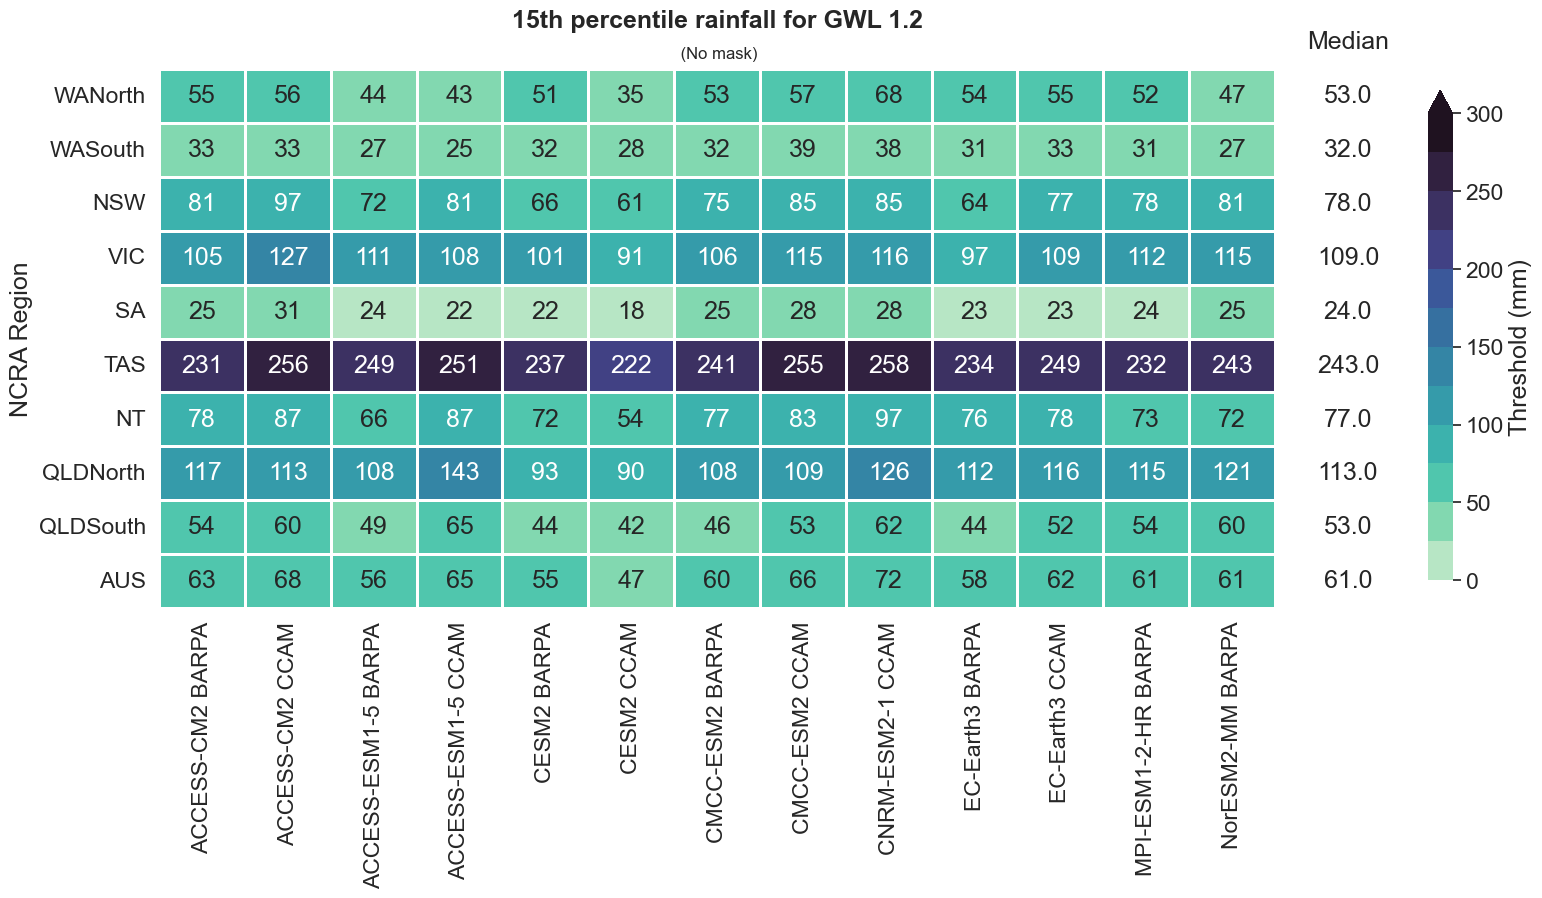

---> Plotting GWL1.5


<Figure size 640x480 with 0 Axes>

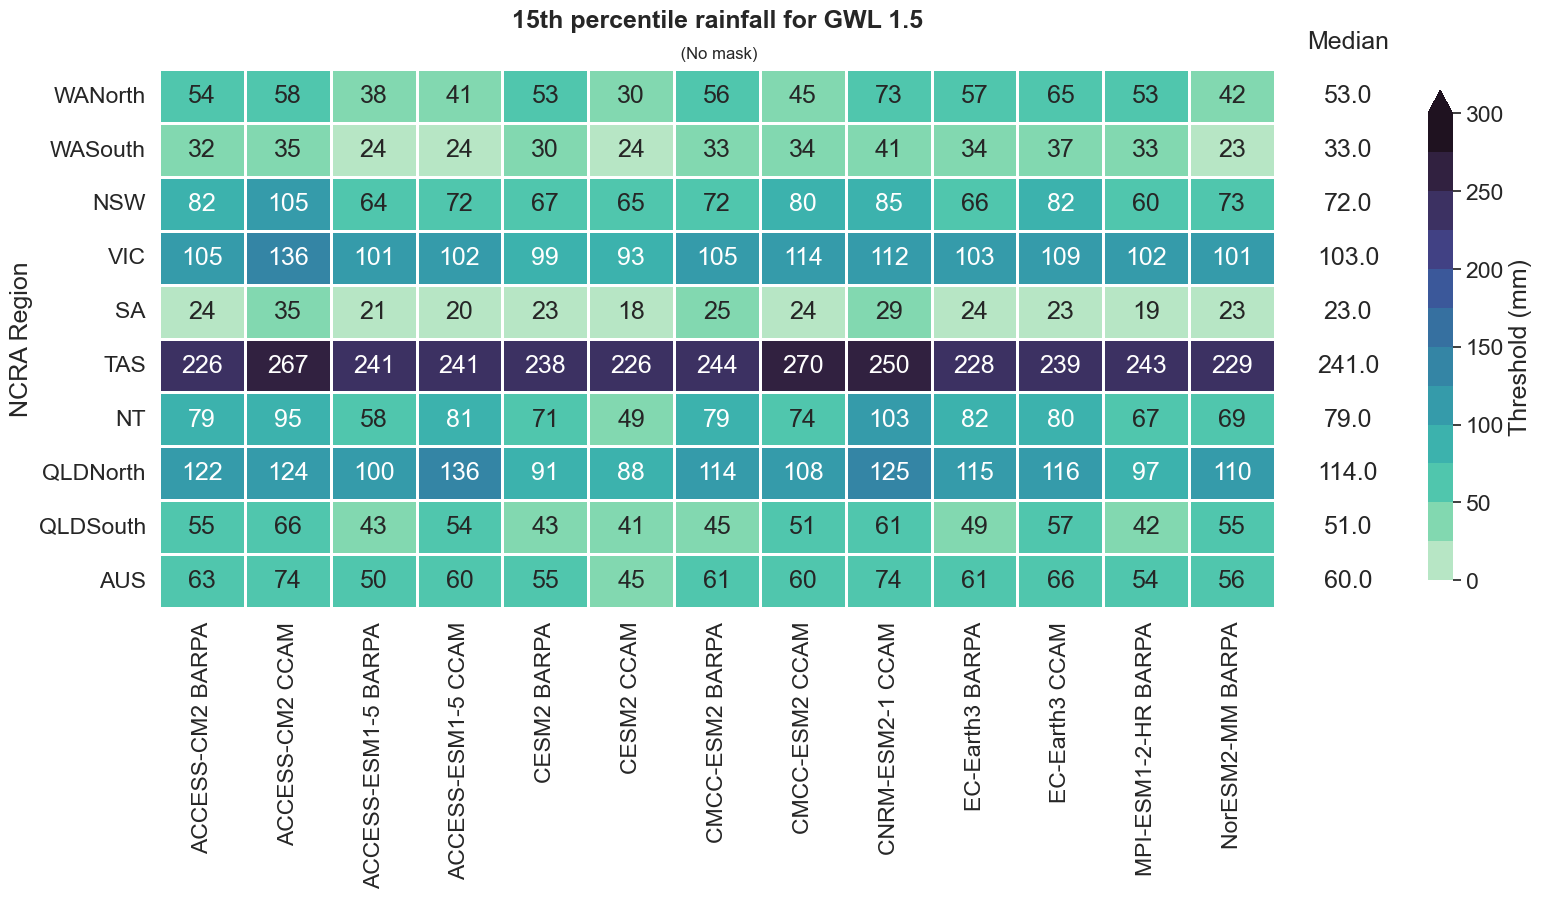

---> Plotting GWL2.0


<Figure size 640x480 with 0 Axes>

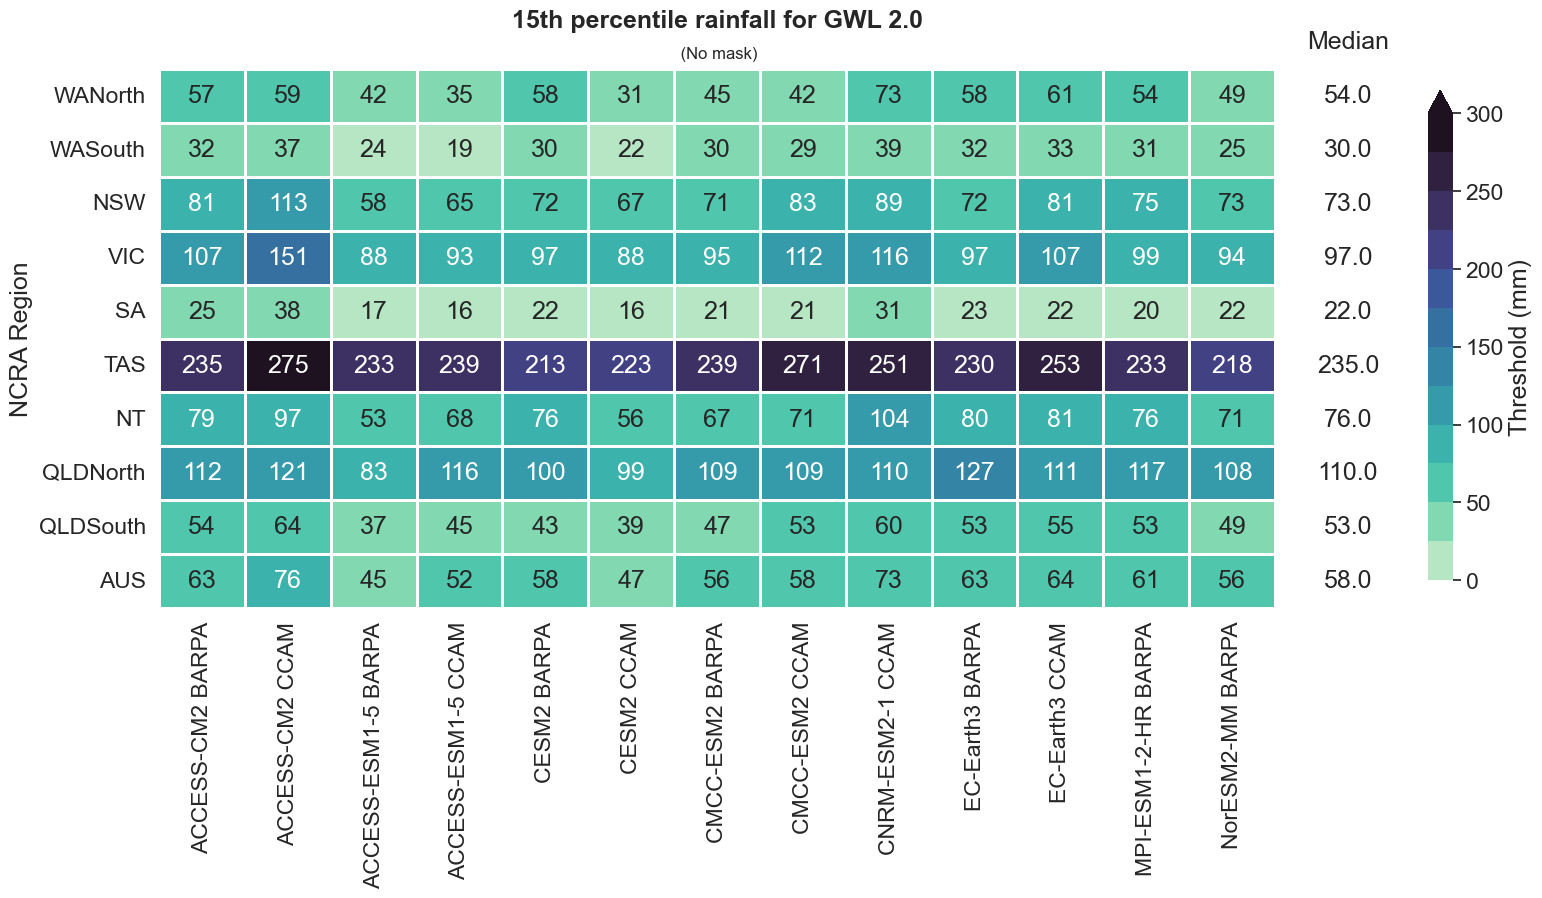

---> Plotting GWL3.0


<Figure size 640x480 with 0 Axes>

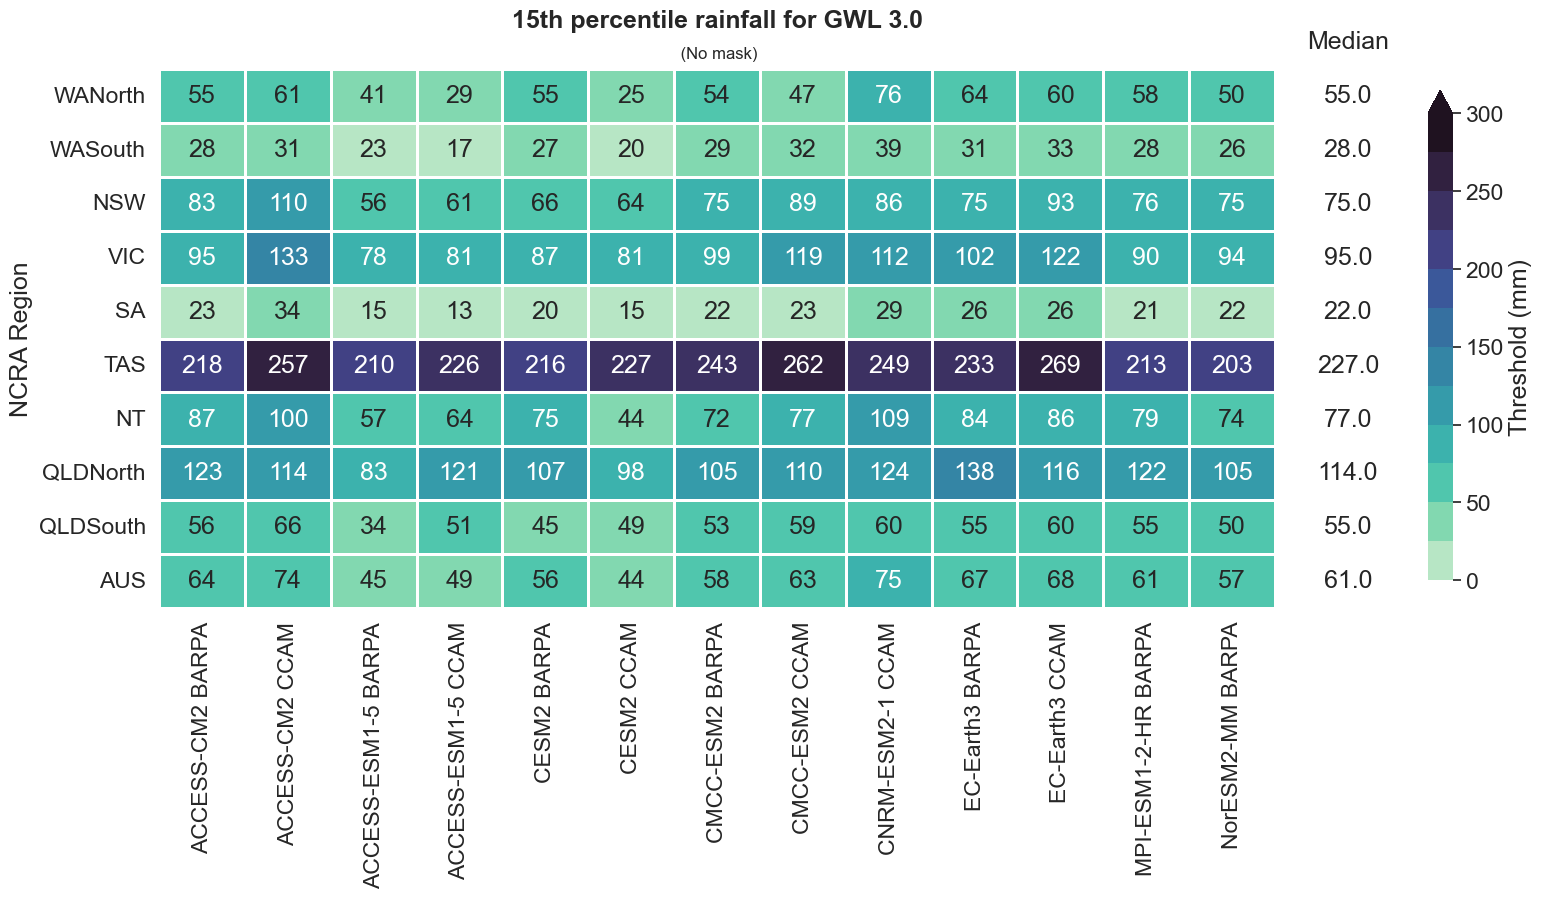

---> Plotting GWL1.2


<Figure size 640x480 with 0 Axes>

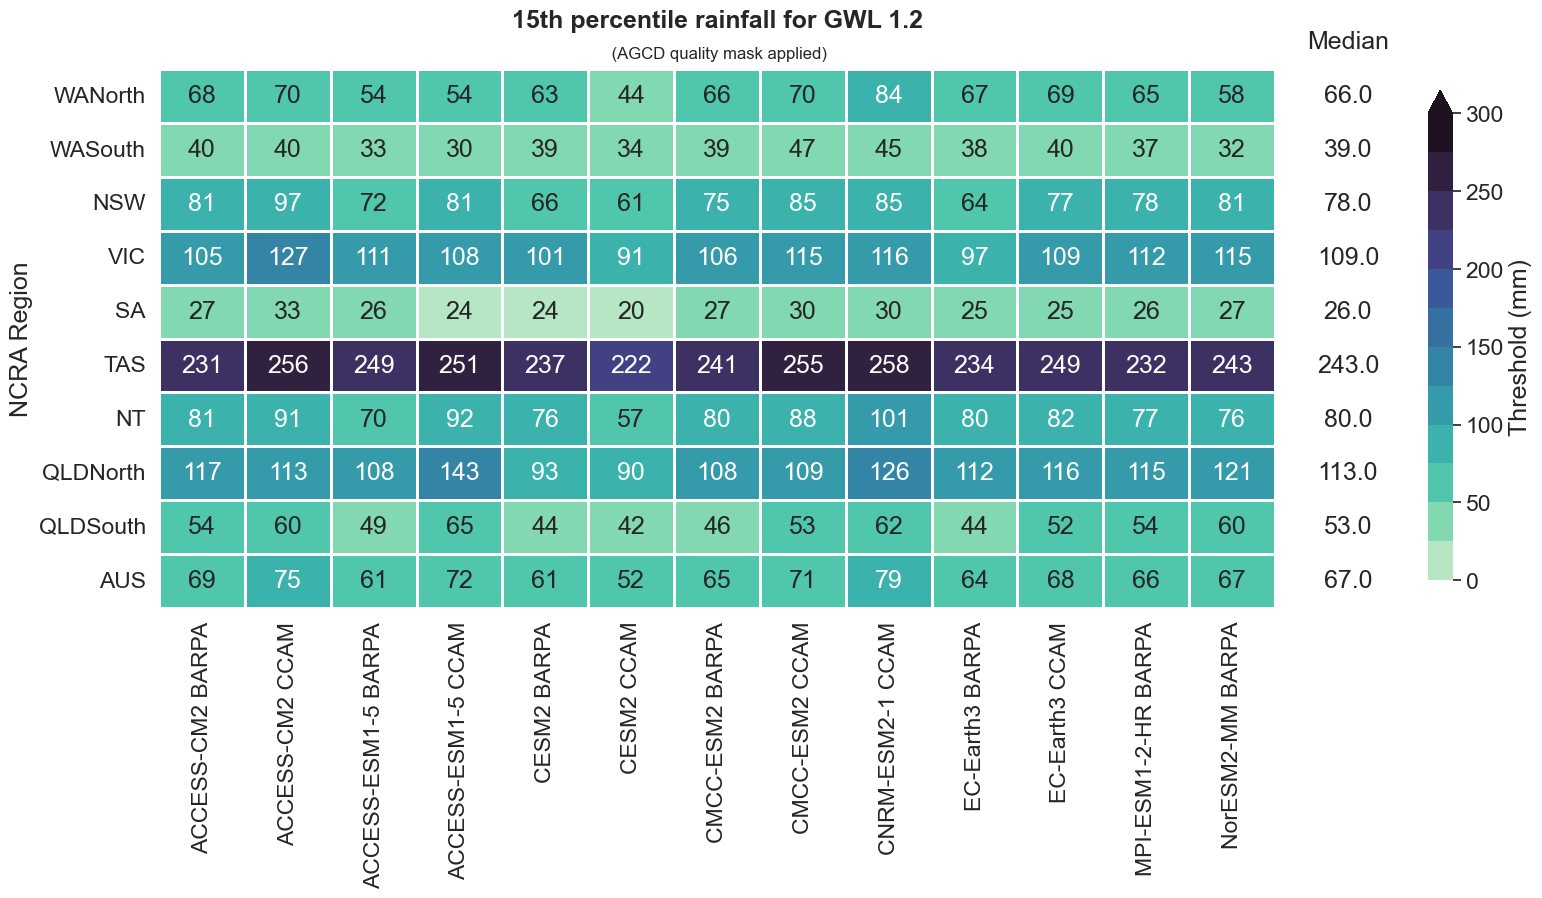

---> Plotting GWL1.5


<Figure size 640x480 with 0 Axes>

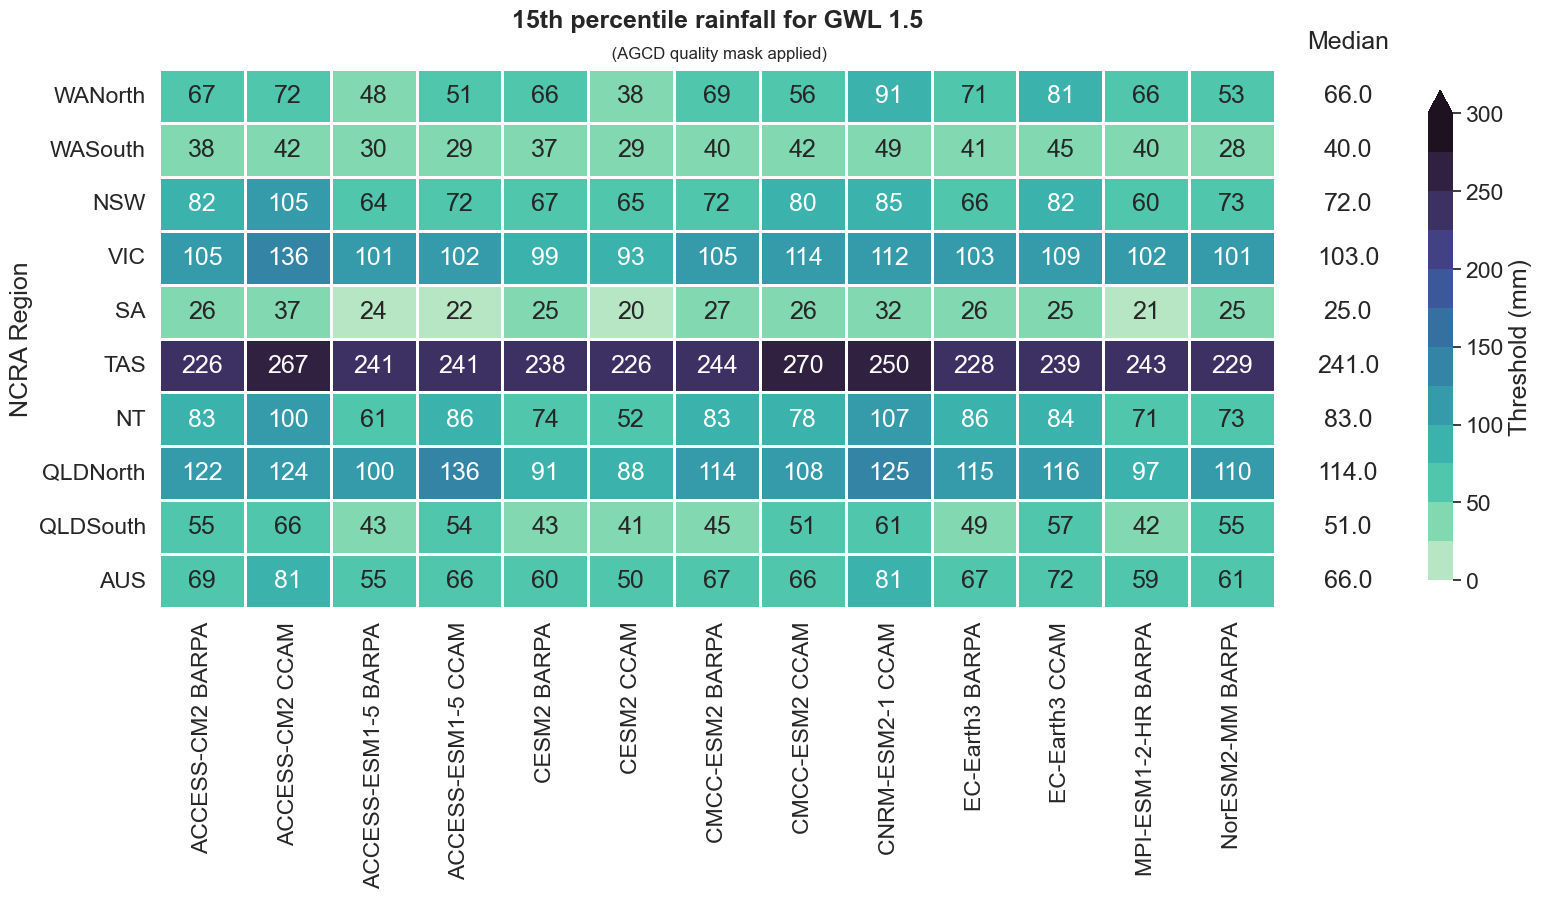

---> Plotting GWL2.0


<Figure size 640x480 with 0 Axes>

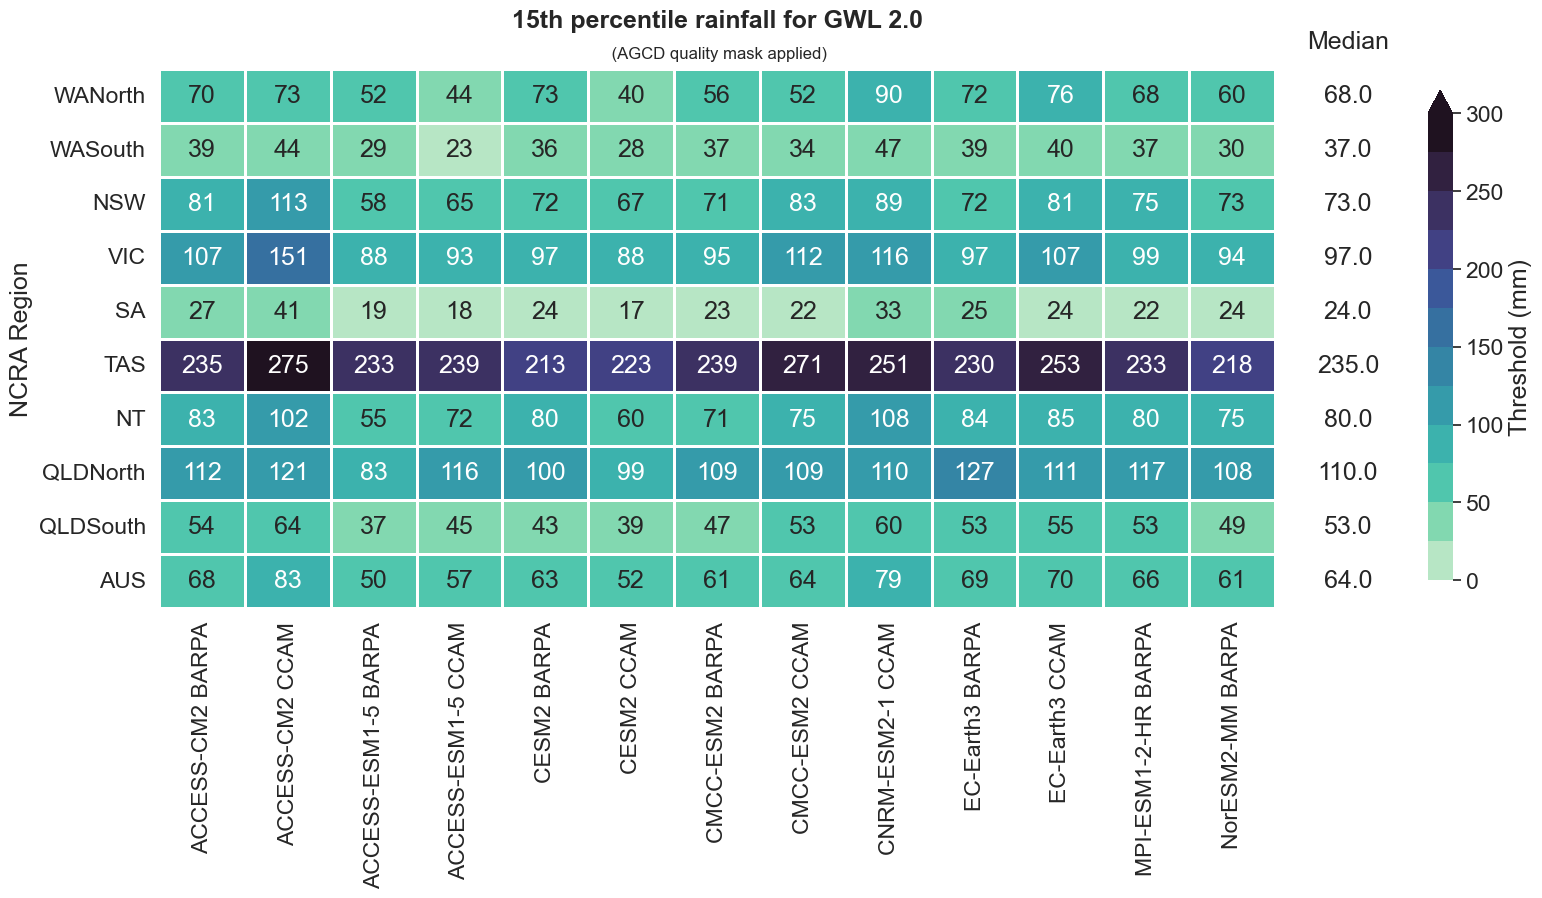

---> Plotting GWL3.0


<Figure size 640x480 with 0 Axes>

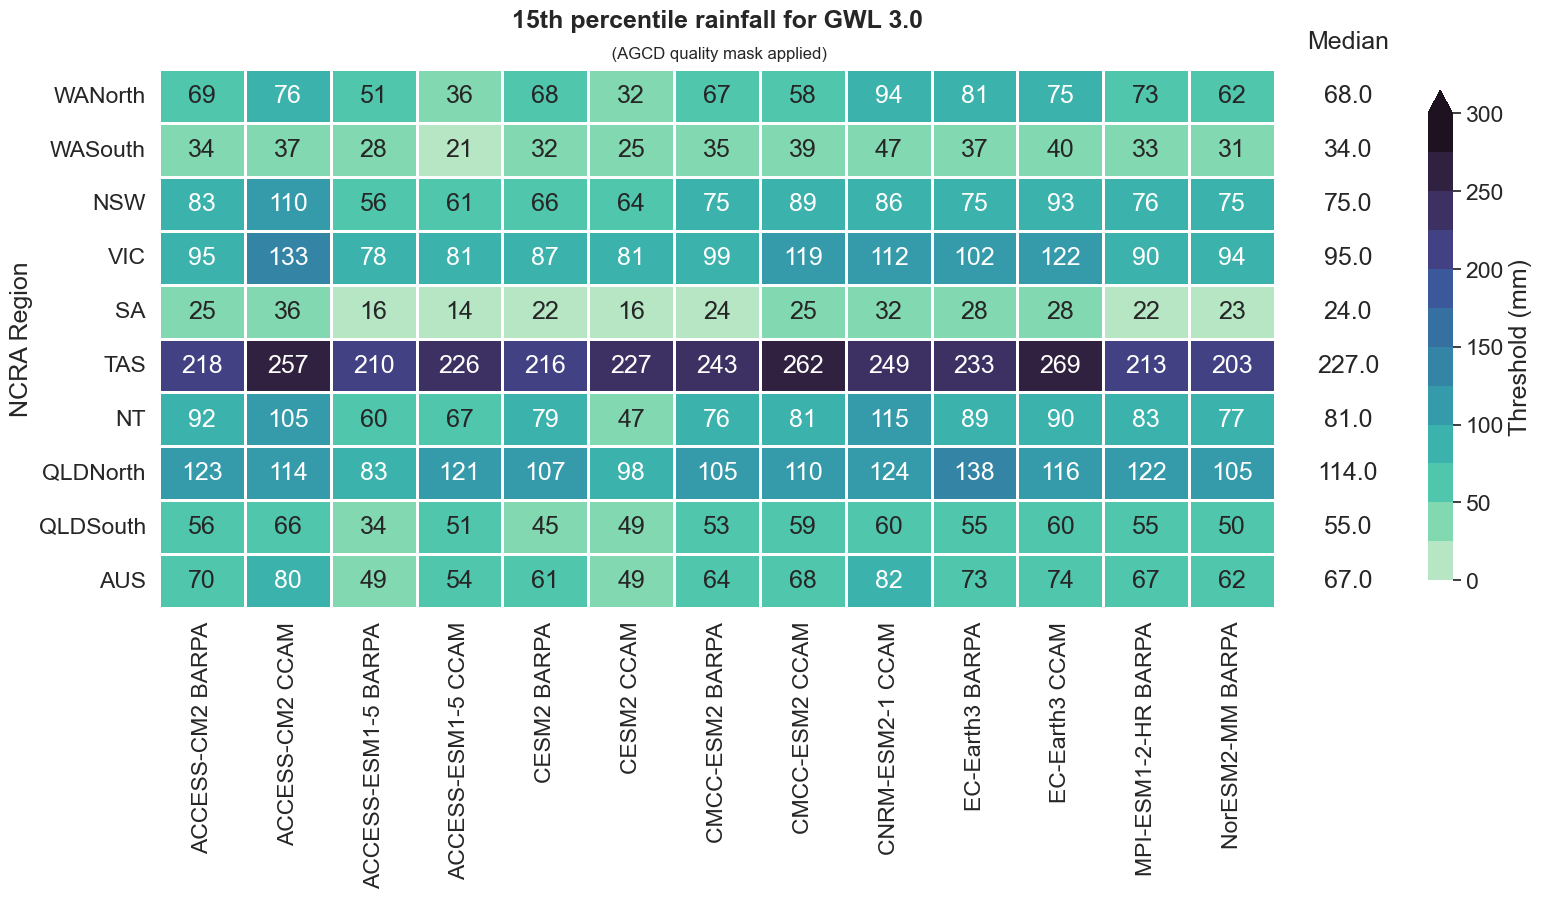

CPU times: user 34min 25s, sys: 3min 26s, total: 37min 52s
Wall time: 37min 58s


<Figure size 640x480 with 0 Axes>

In [9]:
%%time
regions = get_regions(['ncra_regions', 'australia'])
mask_ds = xr.open_dataset("/g/data/ia39/aus-ref-clim-data-nci/shapefiles/masks/AGCD-05i/mask-fraction_agcd_v1-0-2_precip_weight_1960_2022.nc")
q_mask = np.ma.masked_where(mask_ds.fraction >= 0.8, mask_ds.fraction)

for mask_value in [False, True]:
    AGCD_MASK_SWITCH = mask_value

    for GWL_level in [1.2, 1.5, 2.0, 3.0]:
        df_list = []
        for file_ in files_GWL12:
            file_GWLx = [file for file in files if file_.split('_')[-7] in file and file_.split('_')[-4] in file and f'GWL{str(GWL_level)}' in file][0]
            
            ensemble_member_name = file_.split('_')[-7]+'_'+file_.split('_')[-4]
            GWLx = xr.open_dataset(file_GWLx).mean(dim='month').rename({'p15_3month': ensemble_member_name}) if AGCD_MASK_SWITCH==False else (xr.open_dataset(file_GWLx).mean(dim='month').where(q_mask.mask)).rename({'p15_3month': ensemble_member_name})
            mask_frac = regions.mask_3D_frac_approx(GWLx)
            dims = ("lat", "lon",)
            df = acs_regional_stats(ds=GWLx,var=ensemble_member_name, mask=mask_frac, dims = dims, how = ["mean"]).to_dataframe()
            df_list.append(df[df.columns[-1]])
    
        plot_df = pd.concat(df_list, axis=1).rename_axis('NCRA Region')
        plot_df = plot_df.round(decimals=0)
        
        
        print(f'---> Plotting GWL{str(GWL_level)}')
        plot_heatmap(plot_df, GWL_level, p10_p90_annotation_switch=False)

